# Multiclass Classification

In the last notebook, we looked at binary classification. This  works well when the data observations belong to one of two classes or categories, such as "True" or "False". When the data can be categorized into more than two classes, you must use a multiclass classification algorithm.

Multiclass classification can be thought of as a combination of multiple binary classifiers. There are two ways in which you approach the problem:

- **One vs Rest (OVR)**, in which a classifier is created for each possible class value, with a positive outcome for cases where the prediction is *this* class, and negative predictions for cases where the prediction is any other class. A classification problem with four possible shape classes (*square*, *circle*, *triangle*, *hexagon*) would require four classifiers that predict:
    - *square* or not
    - *circle* or not
    - *triangle* or not
    - *hexagon* or not
    
- **One vs One (OVO)**, in which a classifier for each possible pair of classes is created. The classification problem with four shape classes would require the following binary classifiers:
    - *square* or *circle*
    - *square* or *triangle*
    - *square* or *hexagon*
    - *circle* or *triangle*
    - *circle* or *hexagon*
    - *triangle* or *hexagon*

In both approaches, the overall model that combines the classifiers generates a vector of predictions in which the probabilities generated from the individual binary classifiers are used to determine which class to predict.

Fortunately, in most machine learning frameworks, including scikit-learn, implementing a multiclass classification model is not significantly more complex than binary classification - and in most cases, the estimators used for binary classification implicitly support multiclass classification by abstracting an OVR algorithm, an OVO algorithm, or by allowing a choice of either.

> **More Information**: To learn more about estimator support for multiclass classification in Scikit-Learn, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/multiclass.html).

### Explore the data

Let's start by examining a dataset that contains observations of multiple classes. We'll use a dataset that contains observations of three different species of penguin.

> **Citation**: The penguins dataset used in the this exercise is a subset of data collected and made available by [Dr. Kristen
Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a
member of the [Long Term Ecological Research
Network](https://lternet.edu/).

In [5]:
import pandas as pd
import wget

# Cargamos los datos de entrenamiento
wget.download('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv')

penguins = pd.read_csv('penguins.csv')

# Mostramos 10 datos aletarios de todo el set
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
169,49.2,15.2,221.0,6300.0,1
223,46.4,15.6,221.0,5000.0,1
201,45.2,15.8,215.0,5300.0,1
257,46.8,16.1,215.0,5500.0,1
29,40.5,18.9,180.0,3950.0,0
111,45.6,20.3,191.0,4600.0,0
175,46.3,15.8,215.0,5050.0,1
336,51.9,19.5,206.0,3950.0,2
66,35.5,16.2,195.0,3350.0,0
251,51.1,16.5,225.0,5250.0,1


The dataset contains the following columns:
* **CulmenLength**: The length in mm of the penguin's culmen (bill).
* **CulmenDepth**: The depth in mm of the penguin's culmen.
* **FlipperLength**: The length in mm of the penguin's flipper.
* **BodyMass**: The body mass of the penguin in grams.
* **Species**: An integer value that represents the species of the penguin.

The **Species** column is the label we want to train a model to predict. The dataset includes three possible species, which are encoded as 0, 1, and 2. The actual species names are revealed by the code below:

In [11]:
penguins_classes = ['Adelie','Gentoo','Chinstrap']
print(sample.columns[0:5].values,'SpeciesName')

for index, row in penguins.sample(10).iterrows():
    print('[',row[0],row[1],row[2],row[3],row[4],']', penguins_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 43.6 13.9 217.0 4900.0 1.0 ] Gentoo
[ 34.6 21.1 198.0 4400.0 0.0 ] Adelie
[ 47.0 17.3 185.0 3700.0 2.0 ] Chinstrap
[ 48.7 15.7 208.0 5350.0 1.0 ] Gentoo
[ 45.9 17.1 190.0 3575.0 2.0 ] Chinstrap
[ 37.7 16.0 183.0 3075.0 0.0 ] Adelie
[ 48.5 15.0 219.0 4850.0 1.0 ] Gentoo
[ 46.1 15.1 215.0 5100.0 1.0 ] Gentoo
[ 50.0 16.3 230.0 5700.0 1.0 ] Gentoo
[ 37.9 18.6 172.0 3150.0 0.0 ] Adelie


Now that we know what the features and labels in the data represent, let's explore the dataset. First, let's see if there are any missing (*null*) values.

In [12]:
# Valores nulos por columna
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

It looks like there are some missing feature values, but no missing labels. Let's dig a little deeper and see the rows that contain nulls.

In [13]:
# Mostramos las filas que contienen datos nulos
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


There are two rows that contain no feature values at all (*NaN* stands for "not a number"), so these won't be useful in training a model. Let's discard them from the dataset.

In [14]:
# Borramos las filas que contienen valores nulos (NaN values)
penguins=penguins.dropna()
# Confirmamos si existen valores nulos 
penguins.isnull().sum()


CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

Now that we've dealt with the missing values, let's explore how the features relate to the label by creating some box charts.

In [16]:
penguins.shape

(342, 5)

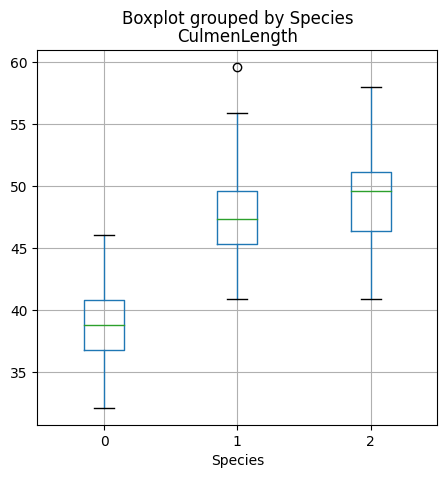

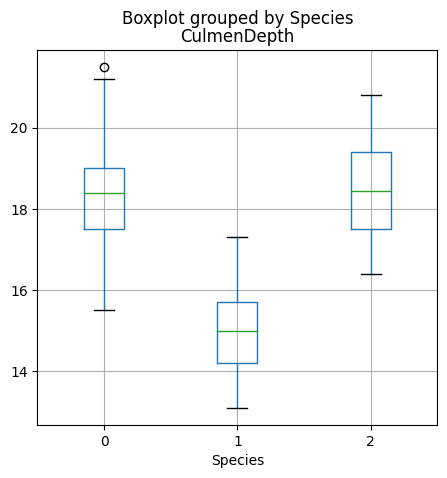

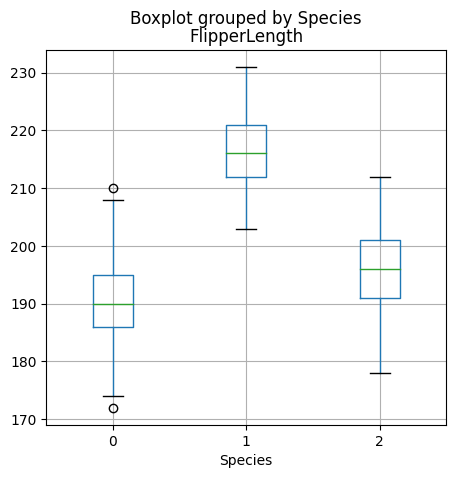

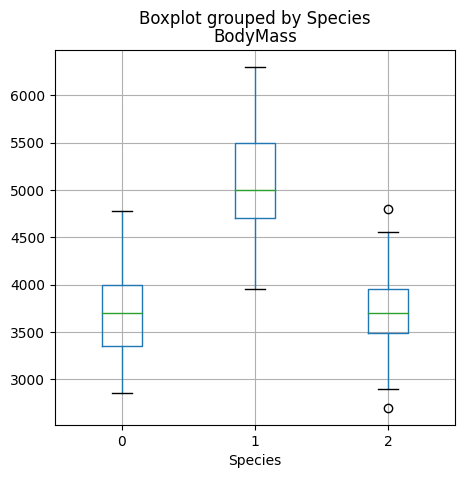

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

penguins_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'

for col in penguins_features:
    penguins.boxplot(column=col, by=penguin_label,figsize=(5,5))
    plt.title(col)
plt.show()

A partir de los diagramas de caja, parece que las especies 0 y 2 (Adelie y Chinstrap) tienen perfiles de datos similares para la profundidad del culmen, la longitud de las aletas y la masa corporal, pero los Chinstrap tienden a tener culmen más largos. La especie 1 (Gentoo) tiende a tener características claramente diferenciadas de las demás; lo que debería ayudarnos a entrenar un buen modelo de clasificación.

### Prepare the data

Al igual que para la clasificación binaria, antes de entrenar el modelo, debemos separar las características y la etiqueta, y luego dividir los datos en subconjuntos para el entrenamiento y la validación. También aplicaremos una técnica de estratificación al dividir los datos para mantener la proporción de cada valor de etiqueta en los conjuntos de datos de entrenamiento y validación.

In [20]:
from sklearn.model_selection import train_test_split

# Separamos caracteristicas y etiquetas
penguins_X, penguins_y = penguins[penguins_features].values, penguins[penguin_label].values

# Dividimos los datos (70% - 30%) --> (Entrenamiento y validacion)
x_penguins_train, x_penguins_test, y_penguins_train, y_penguins_test = train_test_split(penguins_X,penguins_y,
                                                                                        test_size=0.3,          # Proporcion de datos de validacion
                                                                                        random_state=0,
                                                                                        stratify = penguins_y)  # Estratificacion para mantener la proporcion de datos

print('Set de entrenamiento: %d, Set de Validacion: %d \n' % (x_penguins_train.shape[0], x_penguins_test.shape[0]))


Set de entrenamiento: 239, Set de Validacion: 103 



### Train and evaluate a multiclass classifier

*English*:
Now that we have a set of training features and corresponding training labels, we can fit a multiclass classification algorithm to the data to create a model. Most scikit-learn classification algorithms inherently support multiclass classification. We'll try a logistic regression algorithm.

*Spain*:
Ahora que tenemos un conjunto de funciones de entrenamiento y las etiquetas de entrenamiento correspondientes, podemos ajustar un algoritmo de clasificación multiclase a los datos para crear un modelo. La mayoría de los algoritmos de clasificación de scikit-learn admiten de forma inherente la clasificación multiclase. Probaremos un algoritmo de regresión logística.

In [23]:
from sklearn.linear_model import LogisticRegression

# Tasa de regularizacion
reg = 0.1

# Entrenamiento del modelo de regresion logistica con datos de entrenamiento
multi_model = LogisticRegression(C = 1/reg,     # Inverso de tasa de regularizacion
                                 solver='lbfgs',# Solver
                                 multi_class='auto', # Activacion de la opcion de multiclases
                                 max_iter=10000     # Maximo de iteracciones)
                                ).fit(x_penguins_train,y_penguins_train) # Etapa de entrenamiento del modelo

multi_model

LogisticRegression(C=10.0, max_iter=10000)

*English*: Now we can use the trained model to predict the labels for the test features, and compare the predicted labels to the actual labels:

*Spain*: Ahora usemos el modelo entrenado para predecir las etiquetas a partir de las caracteristicas, y comparemos las etiquetas predichas con las actuales

In [24]:
penguin_predictions = multi_model.predict(x_penguins_test)
print('Etiquetas predichas:', penguin_predictions[:15])
print('Etiquetas actuales:', y_penguins_test[:15])

Etiquetas predichas: [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Etiquetas actuales: [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


*English*: Let's look at a classification report.

*Spain*: Miremos el reporte del clasificador

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_penguins_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



### *English*
As with binary classification, the report includes *precision* and *recall* metrics for each class. However, while with binary classification we could focus on the scores for the *positive* class; in this case, there are multiple classes so we need to look at an overall metric (either the macro or weighted average) to get a sense of how well the model performs across all three classes.

You can get the overall metrics separately from the report using the scikit-learn metrics score classes, but with multiclass results you must specify which average metric you want to use for precision and recall.

### *spain*:
Al igual que con la clasificación binaria, el informe incluye métricas de precisión y recuperación para cada clase. Sin embargo, mientras que con la clasificación binaria podríamos centrarnos en las puntuaciones de la clase positiva ; en este caso, hay varias clases, por lo que debemos observar una métrica general (ya sea la macro o el promedio ponderado) para tener una idea de qué tan bien se desempeña el modelo en las tres clases.

Puede obtener las métricas generales por separado del informe utilizando las clases de puntaje de métricas de scikit-learn, pero con los resultados de varias clases debe especificar qué métrica promedio desea usar para precisión y recuperación.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_penguins_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguins_test, penguin_predictions, average='macro'))  # Especificamos que tipo de metrica requerimos
print("Overall Recall:",recall_score(y_penguins_test, penguin_predictions, average='macro'))        # Especificamos que tipo de metrica requerimos

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


Now let's look at the confusion matrix for our model:

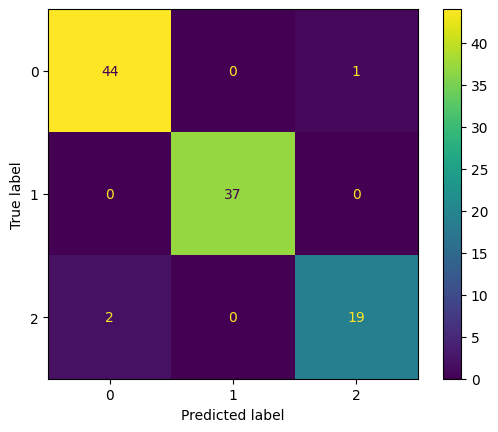

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Mostramos la matriz de confusion
mcm = confusion_matrix(y_penguins_test, penguin_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=mcm, display_labels=multi_model.classes_)
disp.plot()
plt.show()

### *English*
The confusion matrix shows the intersection of predicted and actual label values for each class - in simple terms, the diagonal intersections from top-left to bottom-right indicate the number of correct predictions.

When dealing with multiple classes, it's generally more intuitive to visualize this as a heat map, like this:

### *Spain*
La matriz de confusión muestra la intersección de los valores de etiqueta predichos y reales para cada clase; en términos simples, las intersecciones diagonales de arriba a la izquierda a abajo a la derecha indican el número de predicciones correctas.

Cuando se trata de varias clases, generalmente es más intuitivo visualizar esto como un mapa de calor, como este:

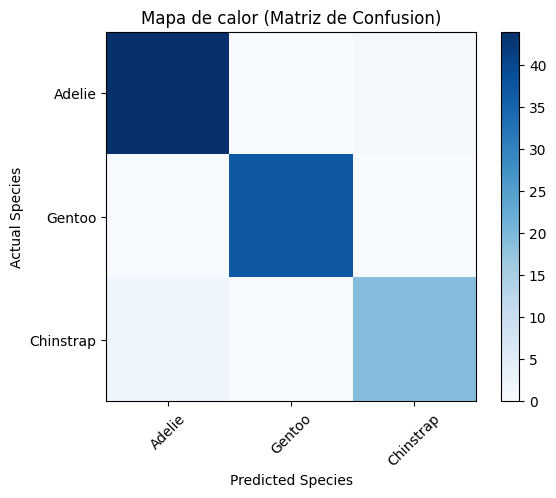

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.title('Mapa de calor (Matriz de Confusion)')
plt.show()

### *English*
The darker squares in the confusion matrix plot indicate high numbers of cases, and you can hopefully see a diagonal line of darker squares indicating cases where the predicted and actual label are the same.

In the case of a multiclass classification model, a single ROC curve showing true positive rate vs false positive rate is not possible. However, you can use the rates for each class in a One vs Rest (OVR) comparison to create a ROC chart for each class.

### *Spain*
Los cuadrados más oscuros en el gráfico de la matriz de confusión indican una gran cantidad de casos y, con suerte, puede ver una línea diagonal de cuadrados más oscuros que indican los casos en los que la etiqueta predicha y la real son las mismas.

En el caso de un modelo de clasificación multiclase, no es posible una sola curva ROC que muestre la tasa de verdaderos positivos frente a la tasa de falsos positivos. Sin embargo, puede usar las tarifas para cada clase en una comparación de Uno vs Resto (OVR) para crear un gráfico ROC para cada clase.



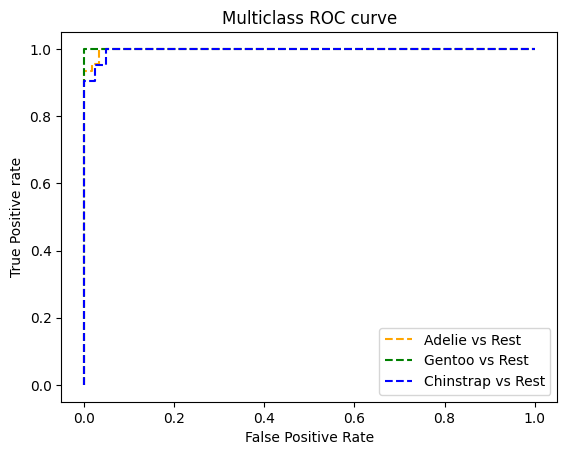

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(x_penguins_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguins_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_penguins_test, penguin_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguins_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguins_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguins_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.

### *Spain*:
Para cuantificar el rendimiento de ROC, puede calcular un área agregada bajo la puntuación de la curva que se promedia en todas las curvas OVR.

In [36]:
auc = roc_auc_score(y_penguins_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9981999902100828


### *ENGLISH*
### Preprocess data in a pipeline

Again, just like with binary classification, you can use a pipeline to apply preprocessing steps to the data before fitting it to an algorithm to train a model. Let's see if we can improve the penguin predictor by scaling the numeric features in a transformation steps before training. We'll also try a different algorithm (a support vector machine), just to show that we can!

### *SPAIN*
### Canalizacion de preprocesamiento de los datos (PIPELINE)

Nuevamente, al igual que con la clasificación binaria, puede usar una canalización para aplicar pasos de preprocesamiento a los datos antes de ajustarlos a un algoritmo para entrenar un modelo. Veamos si podemos mejorar el predictor pingüino escalando las características numéricas en pasos de transformación antes del entrenamiento. También probaremos un algoritmo diferente (una máquina de vectores de soporte), ¡solo para demostrar que podemos!



In [37]:
penguins.head(2)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline   # Pipeline import
from sklearn.svm import SVC             # Support Vector Machine Model import

# Definimos el preprocesamiento para las columnas numericas (escalamiento de datos)
feature_columns = [0,1,2,3]             # Primeras 4 columnas
feature_transformer = Pipeline(steps=[   # Definimos la canalizacion de preprocesamiento (solo para escalado de datos)
    ('scaler',StandardScaler())         # Preceso dentro de la canalizacion
    ])

# Creamos los pasos de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
    ('preprocess',feature_transformer, feature_columns)])

# Creamos canalizacion de entrenamiento 
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),             # Preprocesamiento
    ('regressor', SVC(probability=True))])      # Modelo regresor

# Ajuste de canalizacion para entrenar el modelo de regresion con los datos de entrenamiento
multi_model = pipeline.fit(x_penguins_test,y_penguins_test)
multi_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])

Now we can evaluate the new model.

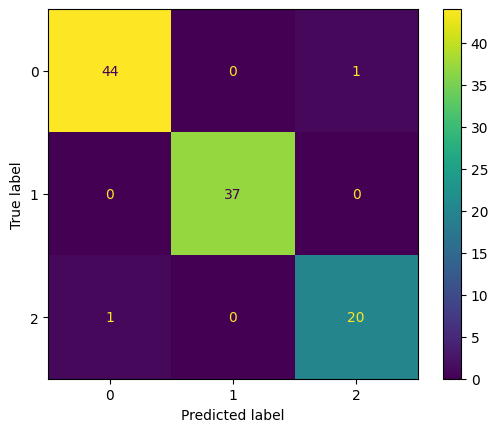

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get predictions from test data
penguin_predictions = multi_model.predict(x_penguins_test)
penguin_prob = multi_model.predict_proba(x_penguins_test)

# Mostramos la matriz de confusion
mcm = confusion_matrix(y_penguins_test, penguin_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=mcm, display_labels=multi_model.classes_)
disp.plot()
plt.show()

Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9990361381446328


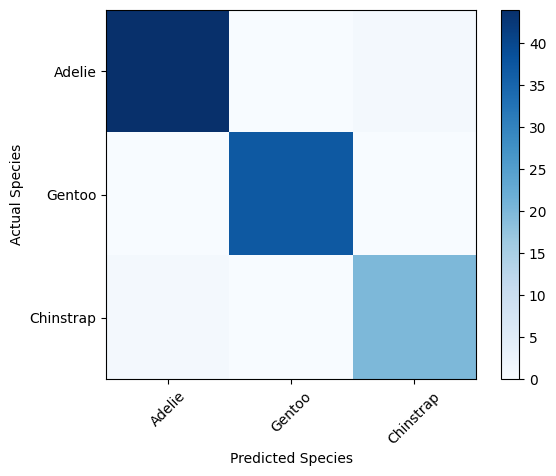

In [45]:
# Get predictions from test data
penguin_predictions = multi_model.predict(x_penguins_test)
penguin_prob = multi_model.predict_proba(x_penguins_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_penguins_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguins_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguins_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_penguins_test,penguin_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

### Use the model with new data observations

Now let's save our trained model so we can use it again later.

### *spain*:
### Usar el modelo con nuevas observaciones de datos
Ahora guardemos nuestro modelo entrenado para que podamos usarlo nuevamente más tarde.

In [47]:
import joblib

# Save the model as a pickle file
filename = './penguin_model.pkl'
joblib.dump(multi_model, filename)

['./penguin_model.pkl']

Bien, ahora tenemos un modelo entrenado. Usémoslo para predecir la clase de una nueva observación de pingüinos:



In [48]:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple penguin observations in a single call)
# We'll create an array with a single array of features, representing one penguin
x_new = np.array([[50.4,15.3,224,5550]])
print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one penguin, so our prediction is the first one in the resulting array.
penguin_pred = multi_model.predict(x_new)[0]
print('Predicted class is', penguin_classes[penguin_pred])

New sample: [  50.4   15.3  224.  5550. ]
Predicted class is Gentoo


También puede enviar un lote de observaciones de pingüinos al modelo y obtener una predicción para cada una.

In [49]:
# This time our input is an array of two feature arrays
x_new = np.array([[49.5,18.4,195, 3600],
         [38.2,20.1,190,3900]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + penguin_classes[prediction] +')')

New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]]
2 (Chinstrap)
0 (Adelie)


## Summary

Classification is one of the most common forms of machine learning, and by following the basic principles we've discussed in this notebook you should be able to train and evaluate classification models with scikit-learn. It's worth spending some time investigating classification algorithms in more depth, and a good starting point is the [Scikit-Learn documentation](https://scikit-learn.org/stable/user_guide.html).

## Resumen
La clasificación es una de las formas más comunes de aprendizaje automático y, siguiendo los principios básicos que hemos discutido en este cuaderno, debería poder entrenar y evaluar modelos de clasificación con scikit-learn. Vale la pena dedicar algún tiempo a investigar los algoritmos de clasificación en mayor profundidad, y un buen punto de partida es la documentación de Scikit-Learn .